In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [4]:
bs = load_boston()

In [5]:
print(bs.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
np.shape(bs.data)

(506, 13)

In [7]:
gg =bs.data[:,12].reshape(-1,1)

In [8]:
print(gg)

[[ 4.98]
 [ 9.14]
 [ 4.03]
 [ 2.94]
 [ 5.33]
 [ 5.21]
 [12.43]
 [19.15]
 [29.93]
 [17.1 ]
 [20.45]
 [13.27]
 [15.71]
 [ 8.26]
 [10.26]
 [ 8.47]
 [ 6.58]
 [14.67]
 [11.69]
 [11.28]
 [21.02]
 [13.83]
 [18.72]
 [19.88]
 [16.3 ]
 [16.51]
 [14.81]
 [17.28]
 [12.8 ]
 [11.98]
 [22.6 ]
 [13.04]
 [27.71]
 [18.35]
 [20.34]
 [ 9.68]
 [11.41]
 [ 8.77]
 [10.13]
 [ 4.32]
 [ 1.98]
 [ 4.84]
 [ 5.81]
 [ 7.44]
 [ 9.55]
 [10.21]
 [14.15]
 [18.8 ]
 [30.81]
 [16.2 ]
 [13.45]
 [ 9.43]
 [ 5.28]
 [ 8.43]
 [14.8 ]
 [ 4.81]
 [ 5.77]
 [ 3.95]
 [ 6.86]
 [ 9.22]
 [13.15]
 [14.44]
 [ 6.73]
 [ 9.5 ]
 [ 8.05]
 [ 4.67]
 [10.24]
 [ 8.1 ]
 [13.09]
 [ 8.79]
 [ 6.72]
 [ 9.88]
 [ 5.52]
 [ 7.54]
 [ 6.78]
 [ 8.94]
 [11.97]
 [10.27]
 [12.34]
 [ 9.1 ]
 [ 5.29]
 [ 7.22]
 [ 6.72]
 [ 7.51]
 [ 9.62]
 [ 6.53]
 [12.86]
 [ 8.44]
 [ 5.5 ]
 [ 5.7 ]
 [ 8.81]
 [ 8.2 ]
 [ 8.16]
 [ 6.21]
 [10.59]
 [ 6.65]
 [11.34]
 [ 4.21]
 [ 3.57]
 [ 6.19]
 [ 9.42]
 [ 7.67]
 [10.63]
 [13.44]
 [12.33]
 [16.47]
 [18.66]
 [14.09]
 [12.27]
 [15.55]
 [13.  ]
 

In [9]:
np.shape(gg)

(506, 1)

In [10]:
hh =bs.target.reshape(-1,1)
np.shape(hh)

(506, 1)

In [113]:
from sklearn.linear_model import BayesianRidge

In [114]:
reg = BayesianRidge ()
reg.fit(gg,hh)

C:\Users\Lenovo\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [115]:
pred = reg.predict(gg)

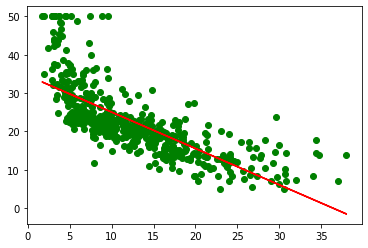

In [116]:
%matplotlib inline
plt.scatter(gg,hh,color="green")
plt.plot(gg,pred,color="red")
plt.show()

In [117]:
from sklearn.preprocessing import PolynomialFeatures

In [118]:
from sklearn.pipeline import make_pipeline

In [119]:
model = make_pipeline(PolynomialFeatures(10),reg)
model.fit(gg,hh)

    

C:\Users\Lenovo\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('bayesianridge',
                 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                               compute_score=False, copy_X=True,
                               fit_intercept=True, lambda_1=1e-06,
                               lambda_2=1e-06, lambda_init=None, n_iter=300,
                               normalize=False, tol=0.001, verbose=False))],
         verbose=False)

In [120]:
predc = model.predict(gg)

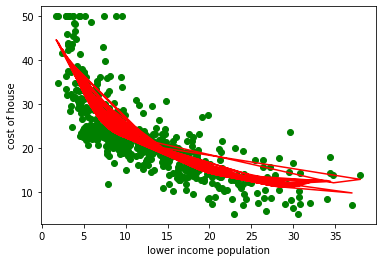

In [121]:
%matplotlib inline
plt.scatter(gg,hh,color="green")
plt.plot(gg,predc,color="red")
plt.xlabel("lower income population")
plt.ylabel("cost of house")
plt.show()

In [122]:
from sklearn.metrics import r2_score

In [123]:
r2_score(predc,hh)

0.5233822476024941